In [208]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [210]:
path = r'C:\Users\Apeksha\Downloads\ecg-csv\ecg-csv\ecg.csv'
df = pd.read_csv(path, header=None)

In [212]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [214]:
# Assuming last column is label (0 = normal, 1 = anomaly)
X = df.iloc[:, :-1].values      #all rows and all columns except last

In [216]:
X

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.12343082,
         0.92528624,  0.19313742],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.874136  ,
        -2.0083694 , -1.8083338 ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.261335  ,
         1.1504486 ,  0.80493225],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092]], shape=(4998, 140))

In [218]:
X=StandardScaler().fit_transform(X)
x_train,x_test=train_test_split(X,test_size=0.2,random_state=42)


In [220]:
# c. Encoder
encoder=Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(8,activation="relu")
])

In [222]:
# --- d. Decoder: reconstruct the original input ---
decoder=Sequential([
    Input(shape=(8,)),
    Dense(16,activation="relu"),
    Dense(32,activation="relu"),
    Dense(x_train.shape[1],activation="linear")
])

In [224]:
# --- e. Compile, train & evaluate the Autoencoder ---
autoencoder=Sequential([
    encoder,
    decoder
])
autoencoder.compile(
    optimizer=Adam(),
    loss="mse",
    metrics=["mae"]
)

In [226]:
#training

history=autoencoder.fit(
    x_train,x_train,
    validation_data=(x_test,x_test),
    epochs=30,
    batch_size=64,
    shuffle=True
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9255 - mae: 0.7231 - val_loss: 0.7647 - val_mae: 0.6398
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6046 - mae: 0.5397 - val_loss: 0.4313 - val_mae: 0.4533
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3823 - mae: 0.4152 - val_loss: 0.3407 - val_mae: 0.3904
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3265 - mae: 0.3771 - val_loss: 0.3028 - val_mae: 0.3621
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2970 - mae: 0.3560 - val_loss: 0.2850 - val_mae: 0.3510
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2788 - mae: 0.3445 - val_loss: 0.2704 - val_mae: 0.3409
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2633 - mae: 0.3349 - val_loss: 0.2555 - val_mae: 0.3324
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2512 - mae: 0.3278 - val_loss: 0.2433 - val_mae: 0.3255
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2371 - mae: 

In [228]:
# --- Evaluate reconstruction errors for anomaly detection ---
reconstruction=autoencoder.predict(x_test)
mse= np.mean(np.power((x_test - reconstruction),2),axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [230]:
threshold=np.percentile(mse,95)
anomalies=(mse>threshold).astype(int)

print(threshold)
print("Anomalies : ",(np.sum(anomalies)/len(anomalies)))
print(np.sum(anomalies))

0.4154455652100558
Anomalies :  0.05
50


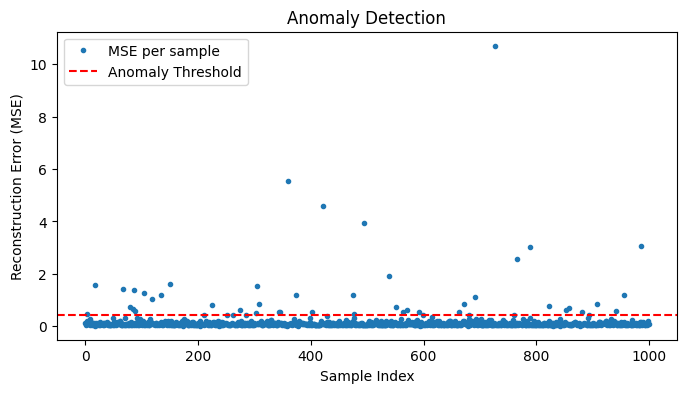

In [232]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE per sample')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Anomaly Detection')
plt.legend()
plt.show()


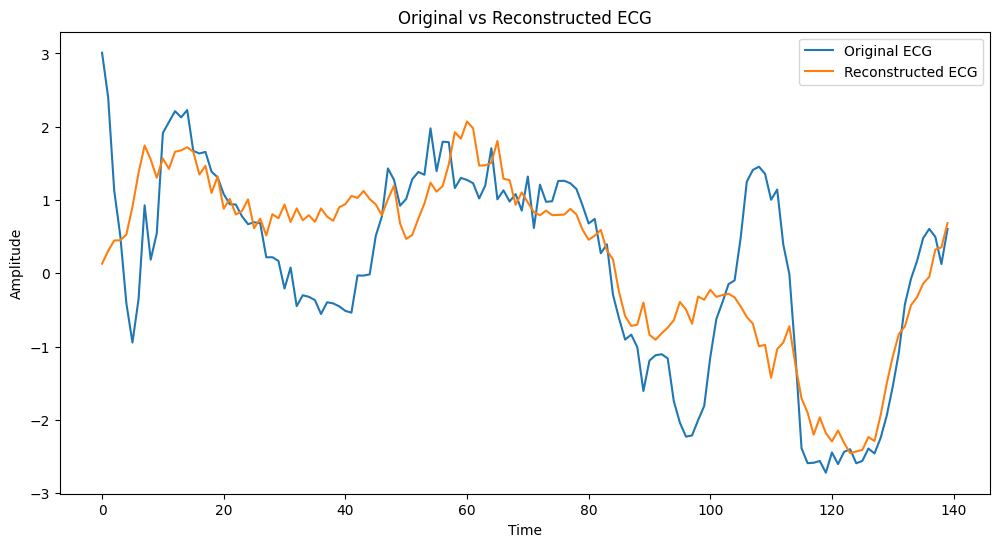

In [234]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(reconstructions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed ECG')
plt.legend()
plt.show()